/tmp/ipykernel_23610/1333341744.py:31: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']
/tmp/ipykernel_23610/1333341744.py:278: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([5e0,1e1],[3e-14,6e-14],'k-',lw=2.5,color=col)
/tmp/ipykernel_23610/1333341744.py:306: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([7e0,1e1],[3e-15,9e-15],'k-',lw=2.5,color=col)
/tmp/ipykernel_23610/1333341744.py:318: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  pl

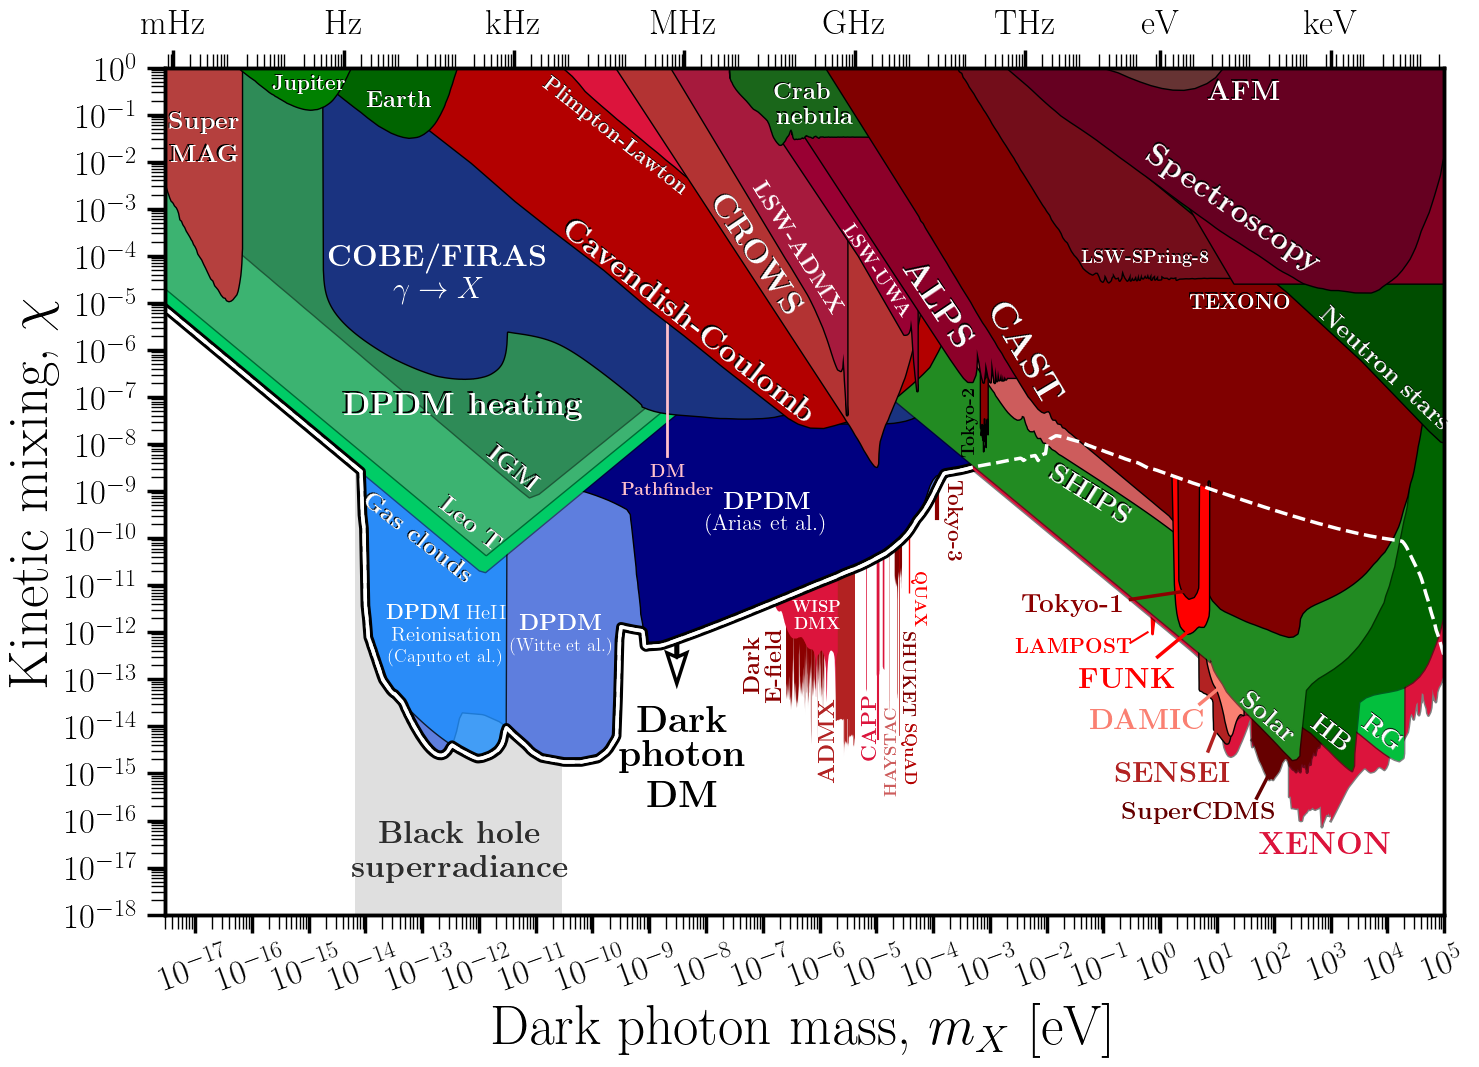

In [2]:
from numpy import *
from numpy.random import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from matplotlib import colors
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
from scipy.stats import norm
from PlotFuncs import col_alpha,CurvedText
from PlotFuncs import MySaveFig
%matplotlib inline


def FigSetup(xlab=r'Dark photon mass, $m_X$ [eV]',ylab='Kinetic mixing, $\chi$',\
             chi_min = 1.0e-18,chi_max = 1.0e0,\
             m_min = 3e-18,m_max = 1e5,\
             lw=2.5,lfs=40,tfs=25,tickdir='out',\
             Grid=False,Shape='Rectangular',mathpazo=True,\
             TopAndRightTicks=False,FrequencyAxis=True,FrequencyLabels=True,UnitAxis=True,f_rescale=1,\
            tick_rotation = 20,width=20,height=10,upper_tickdir='out'):

    plt.rcParams['axes.linewidth'] = lw
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif',size=tfs)

    if mathpazo:
        mpl.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']

    if Shape=='Wide':
        fig = plt.figure(figsize=(16.5,5))
    elif Shape=='Rectangular':
        fig = plt.figure(figsize=(16.5,11))
    elif Shape=='Custom':
        fig = plt.figure(figsize=(width,height))

    ax = fig.add_subplot(111)

    ax.set_xlabel(xlab,fontsize=lfs)
    ax.set_ylabel(ylab,fontsize=lfs)

    ax.tick_params(which='major',direction=tickdir,width=2.5,length=13,right=TopAndRightTicks,top=TopAndRightTicks,pad=7)
    ax.tick_params(which='minor',direction=tickdir,width=1,length=10,right=TopAndRightTicks,top=TopAndRightTicks)


    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim([m_min,m_max])
    ax.set_ylim([chi_min,chi_max])

    locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
    locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
    ax.xaxis.set_major_locator(locmaj)
    ax.xaxis.set_minor_locator(locmin)
    ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

    locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
    locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
    ax.yaxis.set_major_locator(locmaj)
    ax.yaxis.set_minor_locator(locmin)
    ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

    if Shape=='Rectangular':
        plt.xticks(rotation=tick_rotation)

    if Grid:
        ax.grid(zorder=0)

    if FrequencyAxis:
        ax2 = ax.twiny()



        ax2.set_xscale('log')
        ax2.tick_params(which='major',direction=upper_tickdir,width=2.5,length=13,pad=7)
        ax2.tick_params(which='minor',direction=upper_tickdir,width=1,length=10)
        locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
        locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
        ax2.xaxis.set_major_locator(locmaj)
        ax2.xaxis.set_minor_locator(locmin)
        ax2.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

        if FrequencyLabels:
            ax2.set_xticks([1e-3,1e0,1e3,1e6,1e9,1e12,1*241.8*1e12,1000*241.8*1e12])
            ax2.set_xticklabels(['mHz','Hz','kHz','MHz','GHz','THz','eV','keV'])
        ax2.set_xlim([m_min*241.8*1e12/f_rescale,m_max*241.8*1e12/f_rescale])

        plt.sca(ax)
    return fig,ax
    
    
import matplotlib.patheffects as pe
pek=[pe.Stroke(linewidth=7, foreground='k'), pe.Normal()]

    

    
def Haloscopes(ax,col=[0.75, 0.2, 0.2],fs=17,projection=True,text_on=True):
    y2 = ax.get_ylim()[1]
    zo = 0.3
    
    HAYSTAC_col = 'indianred'
    CAPP_col = 'crimson'
    QUAX_col = 'r'
    ADMX_col = 'firebrick'
    
    # ADMX
    costh = sqrt(0.019)
    B = 7.6
    dat = loadtxt("limit_data/AxionPhoton/ADMX.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='none',facecolor=ADMX_col,zorder=0.1,lw=3)

    B = 6.8
    dat = loadtxt("limit_data/AxionPhoton/ADMX2018.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='none',facecolor=ADMX_col,zorder=0.1)

    B = 7.6
    dat = loadtxt("limit_data/AxionPhoton/ADMX2019_1.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='none',facecolor=ADMX_col,zorder=0.1)

    B = 7.6
    dat = loadtxt("limit_data/AxionPhoton/ADMX2019_2.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='none',facecolor=ADMX_col,zorder=0.1)
    
    B = 7.6
    dat = loadtxt("limit_data/AxionPhoton/ADMX2021.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='none',facecolor=ADMX_col,zorder=0.1)

#     B = 3.11
#     dat = loadtxt("limit_data/AxionPhoton/ADMX_Sidecar_AC.txt")
#     dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
#     plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=ADMX_col,facecolor=ADMX_col,zorder=0.1)

#     B = 5.0
#     dat = loadtxt("limit_data/AxionPhoton/ADMX_SLIC.txt")
#     dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
#     plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=ADMX_col,facecolor=ADMX_col,zorder=100)

    
    
    B = 9
    dat = loadtxt("limit_data/AxionPhoton/HAYSTAC_highres.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='none',facecolor=HAYSTAC_col,zorder=0.1)
    dat = loadtxt("limit_data/AxionPhoton/HAYSTAC_2020_highres.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='none',facecolor=HAYSTAC_col,zorder=0.1)

    
    # CAPP
    B = 7.3
    dat = loadtxt("limit_data/AxionPhoton/CAPP-1.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='none',facecolor=CAPP_col,zorder=0.1)

    B = 7.8
    dat = loadtxt("limit_data/AxionPhoton/CAPP-2.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='none',facecolor=CAPP_col,zorder=0.1)

    B = 7.9
    dat = loadtxt("limit_data/AxionPhoton/CAPP-3.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='none',facecolor=CAPP_col,zorder=0.1)

    # CAPP-3 [KSVZ]
    dat_min = dat[argmin(dat[:,1]),:]
    dat_min[1] = dat_min[1]*costh/sqrt(0.2)
    plt.plot([dat_min[0],dat_min[0]],[1e-10,dat_min[1]],'-',color=CAPP_col,lw=1.5,zorder=0.1)


    B = 8.1
    costh = sqrt(0.03)
    dat = loadtxt("limit_data/AxionPhoton/QUAX.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*0.023*dat[:,0]))
    plt.fill_between([dat[0,0],dat[0,0]],[y2,dat[0,1]],y2=y2,color=QUAX_col,zorder=0.1)


    if text_on: 
        plt.text(1.4e-6,0.5e-14,r'{\bf ADMX}',fontsize=fs,color=ADMX_col,rotation=90,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.8e-5,0.1e-13,r'{\bf CAPP}',fontsize=fs-2,color=CAPP_col,rotation=90,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.19e-4,3e-15,r'{\bf HAYSTAC}',fontsize=fs-5,color=HAYSTAC_col,rotation=90,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.55e-4,5e-12,r'{\bf QUAX}',fontsize=fs-5,color=QUAX_col,rotation=-90,rotation_mode='anchor',ha='center',va='center')

    return
    
    
def StellarBounds(ax,fs=19,text_on=True):
    y2 = ax.get_ylim()[1]
    # Stellar physics constraints

    # Globular clusters 
    HB_col = [0.01, 0.75, 0.24]
    HB = loadtxt("limit_data/DarkPhoton/RG.txt")
    plt.plot(HB[:,0],HB[:,1],color='k',alpha=0.5,zorder=0.9,lw=2)
    plt.fill_between(HB[:,0],HB[:,1],y2=y2,edgecolor=None,facecolor=HB_col,zorder=0.9)
    
    # Globular clusters 
    HB_col = 'DarkGreen'
    HB = loadtxt("limit_data/DarkPhoton/HB.txt")
    plt.plot(HB[:,0],HB[:,1],color='k',alpha=0.5,zorder=0.95,lw=2)
    plt.fill_between(HB[:,0],HB[:,1],y2=y2,edgecolor=None,facecolor=HB_col,zorder=0.95)

    # Solar bound
    Solar_col = 'ForestGreen'
    Solar = loadtxt("limit_data/DarkPhoton/Solar.txt")
    plt.plot(Solar[:,0],Solar[:,1],color='k',alpha=0.5,zorder=1.02,lw=2)
    plt.fill_between(Solar[:,0],Solar[:,1],y2=y2,edgecolor=None,facecolor=Solar_col,zorder=1.02)

    Solar = loadtxt("limit_data/DarkPhoton/Solar-Global.txt")
    plt.plot(Solar[:,0],Solar[:,1]/Solar[:,0],color='k',alpha=0.5,zorder=1.021,lw=2)
    plt.fill_between(Solar[:,0],Solar[:,1]/Solar[:,0],y2=y2,edgecolor=None,facecolor=Solar_col,zorder=1.021)

    if text_on:
        plt.text(0.8e2*(1-0.01),1.5e-14*(1+0.05),r'{\bf Solar}',fontsize=fs,color='k',rotation=-41,rotation_mode='anchor',ha='center',va='center')
        plt.text(1e3*(1-0.01),0.7e-14*(1+0.05),r'{\bf HB}',fontsize=fs,color='k',rotation=-38,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.8e4*(1-0.01),0.7e-14*(1+0.05),r'{\bf RG}',fontsize=fs,color='k',rotation=-37,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.8e2,1.5e-14,r'{\bf Solar}',fontsize=fs,color='w',rotation=-41,rotation_mode='anchor',ha='center',va='center')
        plt.text(1e3,0.7e-14,r'{\bf HB}',fontsize=fs,color='w',rotation=-38,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.8e4,0.7e-14,r'{\bf RG}',fontsize=fs,color='w',rotation=-37,rotation_mode='anchor',ha='center',va='center')
    return

    
def Xenon(ax,col='crimson',fs=23,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/Xenon1T.txt")
    dat[:,1] = dat[:,1]*sqrt(0.3/0.45)

    plt.plot(1e3*dat[:,0],dat[:,1],color='k',alpha=0.5,zorder=0.5,lw=2)
    plt.fill_between(1e3*dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.5)
    
    dat = loadtxt("limit_data/DarkPhoton/Xenon1T_S1S2.txt")
    dat[:,1] = dat[:,1]*sqrt(0.3/0.45)

    plt.plot(dat[:,0],dat[:,1],color='k',alpha=0.5,zorder=0.5,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.5)
    
    
    dat = loadtxt("limit_data/DarkPhoton/XENON1T_SE.txt")
    dat[:,1] = dat[:,1]*sqrt(0.3/0.45)
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=0.5,zorder=0.5,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.5)
    
        
    dat = loadtxt("limit_data/DarkPhoton/XENON1T_Solar_S2.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=0.5,zorder=0.5,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.5)
    
    if text_on: 
        plt.text(8e2,3e-17,r'{\bf XENON}',fontsize=fs,color=col,rotation=0,rotation_mode='anchor',ha='center',va='center')
    
    return





def DAMIC(ax,col='salmon',fs=21,text_on=True):
    m1,y1 = loadtxt("limit_data/DarkPhoton/DM_combined.txt",unpack=True)
    dat = loadtxt("limit_data/DarkPhoton/DAMIC.txt")
    dat[:,1] = dat[:,1]*sqrt(0.3/0.45)

    y2 = interp(dat[:,0],m1,y1)
    dat[0,1] = y2[0]
    dat[-1,1] = y2[-1]
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.001,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.001)
    if text_on: 
        plt.text(6e-1,1.3e-14,r'{\bf DAMIC}',fontsize=fs,color=col,rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.plot([5e0,1e1],[3e-14,6e-14],'k-',lw=2.5,color=col)
    return


def FUNK(ax,col='red',fs=21,text_on=True):
    m1,y1 = loadtxt("limit_data/DarkPhoton/DM_combined.txt",unpack=True)
    dat = loadtxt("limit_data/DarkPhoton/FUNK.txt")
    dat[:,1] = dat[:,1]*sqrt(0.3/0.45)*sqrt(2/3/0.27)

    y2 = interp(dat[:,0],m1,y1)
    dat[0,1] = y2[0]/1.1
    dat[-1,1] = y2[-1]/1.1
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.3,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.3)
    if text_on: 
        plt.text(2.6e-1,1e-13,r'{\bf FUNK}',fontsize=fs,color=col,rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.plot([9e-1,3e0],[3e-13,1e-12],'k-',lw=2.5,color=col)
    return

def SENSEI(ax,col='firebrick',fs=21,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/SENSEI.txt")
    dat[:,1] = dat[:,1]*sqrt(0.3/0.45)

    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1)
    if text_on: 
        plt.text(1.7e0,1e-15,r'{\bf SENSEI}',fontsize=fs,color=col,rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.plot([7e0,1e1],[3e-15,9e-15],'k-',lw=2.5,color=col)
    return

def SuperCDMS(ax,col=[0.4,0,0],fs=18,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/SuperCDMS.txt")
    dat[:,1] = dat[:,1]*sqrt(0.3/0.45)
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=0.5,zorder=0.6,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.6)
    
    if text_on: 
        plt.text(0.5e1,1.5e-16,r'{\bf SuperCDMS}',fontsize=fs,color=col,rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.plot([5e1,0.8e2],[3e-16,9e-16],'k-',lw=2.5,color=col)
    return

def Nanowire(ax,col='pink',fs=22,text_on=True):
    m1,y1 = loadtxt("limit_data/DarkPhoton/DM_combined.txt",unpack=True)
    dat = loadtxt("limit_data/DarkPhoton/WSi_Nanowire.txt")
    dat[:,1] = dat[:,1]*sqrt(0.3/0.45)
    y2 = interp(dat[:,0],m1,y1)
    dat[0,1] = y2[0]/1.1
    dat[-1,1] = y2[-1]/1.1
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.3,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.3)
    if text_on: 
        plt.text(5e-4,1e-10,r'{\bf WSi Nanowire}',fontsize=fs,color=col,rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.plot([9e-3,3e-3],[3e-10,9e-10],'k-',lw=2.5,color=col)
    return

def LAMPOST(ax,col='red',fs=15,text_on=True):
    m1,y1 = loadtxt("limit_data/DarkPhoton/DM_combined.txt",unpack=True)
    dat = loadtxt("limit_data/DarkPhoton/LAMPOST.txt")
    dat[:,1] = dat[:,1]*sqrt(0.4/0.45)*sqrt(2/3/0.27)

    y2 = interp(dat[:,0],m1,y1)
    dat[0,1] = y2[0]/1.1
    dat[-1,1] = y2[-1]/1.1
    plt.plot(dat[:,0],dat[:,1],color=col,alpha=1,zorder=0,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0)
    if text_on: 
        plt.text(0.3e-1,5e-13,r'{\bf LAMPOST}',fontsize=fs,color=col,rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.plot([3e-1,0.6e0],[6e-13,1e-12],'-',lw=1.5,color=col)
    return

def Tokyo(ax,col='darkred',fs=15,text_on=True):
    m1,y1 = loadtxt("limit_data/DarkPhoton/DM_combined.txt",unpack=True)
    dat = loadtxt("limit_data/DarkPhoton/Tokyo-Dish.txt")
    dat[:,1] = dat[:,1]*sqrt(2/3/0.6)
    y2 = interp(dat[:,0],m1,y1)
    dat[0,1] = y2[0]/1.1
    dat[-1,1] = y2[-1]/1.1
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.4,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.4)

    
    dat = loadtxt("limit_data/DarkPhoton/Tokyo-Knirck.txt")
    dat[:,1] = dat[:,1]*sqrt(1/3/0.175)
    plt.fill_between(dat[:,0],dat[:,1],y2=1e0,edgecolor='k',facecolor=col,zorder=1.09)
    
    dat = loadtxt("limit_data/DarkPhoton/Tokyo-Tomita.txt")
    plt.plot([dat[1,0],dat[1,0]],[dat[1,1],1e0],'-',color=col,lw=3,zorder=0.2)
    if text_on: 
        plt.text(2.3e-4,2.5e-10,r'{\bf Tokyo-3}',fontsize=fs,color=col,rotation=-90,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.45e-3,3e-8,r'{\bf Tokyo-2}',fontsize=fs-2,color='k',rotation=90,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.3e-1,4e-12,r'{\bf Tokyo-1}',fontsize=fs+4,color=col,rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.plot([3e-1,4e0],[5e-12,8e-12],'-',lw=2.5,color=col)
    return
    

def Jupiter(ax,col='Green',fs=15,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/Jupiter.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=2,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=2)
    if text_on: 
        plt.text(0.1e-14*(1-0.02),4.5e-1*(1+0.07),r'{\bf Jupiter}',fontsize=fs,color='k',rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.1e-14,4.5e-1,r'{\bf Jupiter}',fontsize=fs,color='w',rotation=0,rotation_mode='anchor',ha='center',va='center')
    return

def Earth(ax,col='DarkGreen',fs=17,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/Earth.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.9,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.9)
    if text_on: 
        plt.text(0.4e-13*(1-0.01),2e-1*(1+0.05),r'{\bf Earth}',fontsize=fs,color='k',rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.4e-13,2e-1,r'{\bf Earth}',fontsize=fs,color='w',rotation=0,rotation_mode='anchor',ha='center',va='center')
    return


def Crab(ax,col=[0.1,0.4,0.1],fs=17,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/Crab.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.09999,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.09999)
    
#     dat = loadtxt("limit_data/DarkPhoton/Crab_2.txt")
#     plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.9,lw=2)
#     plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.9)
    if text_on: 
        plt.text(0.5e-6*(1-0.02),3e-1*(1+0.07),r'{\bf Crab}',fontsize=fs,color='k',rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.5e-6,3e-1,r'{\bf Crab}',fontsize=fs,color='w',rotation=0,rotation_mode='anchor',ha='center',va='center')
    
        plt.text(0.8e-6*(1-0.02),0.9e-1*(1+0.07),r'{\bf nebula}',fontsize=fs,color='k',rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.8e-6,0.9e-1,r'{\bf nebula}',fontsize=fs,color='w',rotation=0,rotation_mode='anchor',ha='center',va='center')
    
    return


def SHUKET(ax,col='maroon',fs=13,text_on=True,edge_on=False,lw=0.8):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/SHUKET.txt")
    dat[:,1] = dat[:,1]*sqrt(0.3/0.45)*sqrt(1/3/0.038)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.2)
    if edge_on:
        plt.plot(dat[:,0],dat[:,1],'k-',lw=lw,zorder=0.2)
    if text_on: 
        plt.text(3.5e-5,0.13e-12,r'{\bf SHUKET}',fontsize=fs,color=col,rotation=-90,rotation_mode='anchor',ha='center',va='center')
    return

def DarkEfield(ax,col='darkred',fs=17,text_on=True,edge_on=False,lw=0.8):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/DarkEfield.txt")
    dat[:,1] = dat[:,1]*sqrt(1.64/5) # convert from 5 sigma CL to 95%
    dat[:,1] = dat[:,1]*sqrt(0.3/0.45)*sqrt(1/3/0.129)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.2)
    if edge_on:
        plt.plot(dat[:,0],dat[:,1],'k-',lw=lw,zorder=0.2)
    if text_on: 
        plt.text(0.8e-7/1.2,0.2e-12,r'{\bf Dark}',fontsize=fs,color=col,rotation=90,rotation_mode='anchor',ha='center',va='center')
        plt.text(2e-7/1.2,0.2e-12,r'{\bf E-field}',fontsize=fs,color=col,rotation=90,rotation_mode='anchor',ha='center',va='center')
    return

def WISPDMX(ax,col='crimson',fs=12,text_on=True,edge_on=False,lw=0.8):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/WISPDMX.txt")
    dat[:,1] = dat[:,1]*sqrt(0.3/0.45)*sqrt(1/3/0.23)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.201)
    if edge_on:
        plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=0.201,lw=lw)

    if text_on: 
        plt.text(9e-7,4.1e-12/1.2,r'{\bf WISP}',fontsize=fs,color='w',rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.text(9e-7,1.8e-12/1.2,r'{\bf DMX}',fontsize=fs,color='w',rotation=0,rotation_mode='anchor',ha='center',va='center')

    return

def SQuAD(ax,col=[0.7,0,0],fs=12,text_on=True,lw=0.5,point_on=False,ms=10):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/SQuAD.txt")
    dat[:,1] = dat[:,1]*sqrt(0.4/0.45)*sqrt(1/3/0.019)
    plt.plot([dat[0,0],dat[0,0]],[y2,dat[0,1]],lw=lw,color=col,alpha=1,zorder=0.2)
    if point_on:
        plt.plot(dat[0,0],dat[0,1],'o',mfc=col,mec='k',mew=lw+1,zorder=0.2,markersize=ms)
    if text_on: 
        plt.text(36e-6,0.25e-14,r'{\bf SQuAD}',fontsize=fs,color=col,rotation=-90,rotation_mode='anchor',ha='center',va='center')
    return

def DMPathfinder(ax,col='pink',fs=13,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/DM-Pathfinder.txt")
    dat[:,1] = dat[:,1]*sqrt(1/0.075)
    plt.plot([dat[0,0],dat[0,0]],[y2,dat[0,1]],lw=2,color=col,alpha=1,zorder=0.6)
    if text_on: 
        plt.text(2.1e-9,0.5e-8/1.9,r'{\bf DM}',fontsize=fs,color=col,rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.text(2.1e-9,0.2e-8/1.9,r'{\bf Pathfinder}',fontsize=fs,color=col,rotation=0,rotation_mode='anchor',ha='center',va='center')

    return

def DarkMatter(ax,Witte_col='royalblue',Caputo_col='dodgerblue',Arias_col='navy',fs=20,projection=True,text_on=True):
    y2 = ax.get_ylim()[1]
    zo = 0.3
    
    # Combined limits
    dat = loadtxt("limit_data/DarkPhoton/DM_combined.txt")
    plt.plot(dat[:,0],dat[:,1],'-',color='w',alpha=1,zorder=zo+0.1,lw=2.5,path_effects=pek)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor='lightgray',zorder=zo,alpha=1.0)
    plt.plot([1e-16,dat[0,0]],[dat[0,1],dat[0,1]],'--',color='w',alpha=1,zorder=zo+0.1,lw=2.5,path_effects=pek)
    plt.fill_between([1e-16,dat[0,0]],[dat[0,1],dat[0,1]],y2=y2,edgecolor=None,facecolor='lightgray',zorder=zo+0.1,alpha=1.0)
    plt.plot(dat[40:,0],dat[40:,1],'--',color='w',alpha=1,lw=2.5,zorder=1000,solid_capstyle='round')
    
    # Individual limits
    dat2 = loadtxt("limit_data/DarkPhoton/Cosmology_Witte_inhomogeneous.txt")
    dat4 = loadtxt("limit_data/DarkPhoton/Cosmology_Caputo_HeII.txt",delimiter=',')
    dat5 = loadtxt("limit_data/DarkPhoton/Cosmology_Arias.txt")
    
    plt.fill_between(dat2[:,0],dat2[:,1],y2=y2,edgecolor='k',facecolor=Witte_col,zorder=0.305,alpha=0.8)
    plt.fill_between(dat4[:,0],dat4[:,1],y2=y2,edgecolor='k',facecolor=Caputo_col,zorder=0.305,alpha=0.8)
    plt.fill_between(dat5[:,0],dat5[:,1],y2=y2,edgecolor='k',facecolor=Arias_col,zorder=0.306,alpha=1)

    if text_on: 
        plt.gcf().text(0.295,0.42-0.04,r'{\bf DPDM} HeII',fontsize=15,color='w',ha='center')
        plt.gcf().text(0.295,0.4-0.04,r'Reionisation',fontsize=15,color='w',ha='center')
        plt.gcf().text(0.295,0.38-0.04,r'(Caputo et al.)',fontsize=13,color='w',ha='center')

        plt.gcf().text(0.365,0.37,r'{\bf DPDM}',fontsize=17,color='w',ha='center')
        plt.gcf().text(0.365,0.35,r'(Witte et al.)',fontsize=13,color='w',ha='center')

        plt.gcf().text(0.49,0.48,r'{\bf DPDM}',fontsize=18,color='w',ha='center')
        plt.gcf().text(0.49,0.46,r'(Arias et al.)',fontsize=16,color='w',ha='center')

    return
    
def COBEFIRAS(ax,col=[0.1,0.2,0.5],text_on=True):
    y2 = ax.get_ylim()[1]   
    dat3 = loadtxt("limit_data/DarkPhoton/COBEFIRAS.txt",delimiter=',')
    plt.fill_between(dat3[:,0],dat3[:,1],y2=y2,edgecolor='k',facecolor=col,zorder=0.5,alpha=1)
    if text_on: 
        plt.gcf().text(0.29,0.70,r'{\bf COBE/FIRAS}',fontsize=22,color='w',ha='center')
        plt.gcf().text(0.29,0.67,r'$\gamma \rightarrow X$',fontsize=22,color='w',ha='center')
    return


def LSW(ax,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/SPring-8.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.1001,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=[0.45, 0.05, 0.1],zorder=1.1001)
    
    dat = loadtxt("limit_data/DarkPhoton/ALPS.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.091,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=[0.55, 0.0, 0.16],zorder=1.091)
    
    dat = loadtxt("limit_data/DarkPhoton/LSW_UWA.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.09,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=[0.6, 0.0, 0.2],zorder=1.09)
    
    dat = loadtxt("limit_data/DarkPhoton/LSW_ADMX.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.089,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=[0.65, 0.1, 0.24],zorder=1.089)
    
#     dat = loadtxt("limit_data/DarkPhoton/LSW_CERN.txt")
#     plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.089,lw=2)
#     plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=[0.65, 0.15, 0.2],zorder=1.089)
    
    dat = loadtxt("limit_data/DarkPhoton/CROWS.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.08,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=[0.7, 0.2, 0.2],zorder=1.08)
    
    if text_on: 
        plt.text(0.4e-6,0.15e-3,r'{\bf LSW-ADMX}',fontsize=17,color='w',rotation=-58,rotation_mode='anchor',ha='center',va='center')
        plt.text(1e-5,5e-5,r'{\bf LSW-UWA}',fontsize=14,color='w',rotation=-56,rotation_mode='anchor',ha='center',va='center')
        
        plt.text(0.55e0*(1-0.02),0.9e-4*(1+0.08),r'{\bf LSW-SPring-8}',fontsize=13,color='k',rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.55e0,0.9e-4,r'{\bf LSW-SPring-8}',fontsize=13,color='w',rotation=0,rotation_mode='anchor',ha='center',va='center')

        
        plt.text(1.2e-4*(1-0.02),0.9e-5*(1+0.08),r'{\bf ALPS}',fontsize=25,color='k',rotation=-56,rotation_mode='anchor',ha='center',va='center')
        plt.text(1.2e-4,0.9e-5,r'{\bf ALPS}',fontsize=25,color='w',rotation=-56,rotation_mode='anchor',ha='center',va='center')

        plt.text(0.75e-7*(1-0.01),9.9e-5*(1+0.05),r'{\bf CROWS}',fontsize=24,color='k',rotation=-56,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.75e-7,9.9e-5,r'{\bf CROWS}',fontsize=24,color='w',rotation=-56,rotation_mode='anchor',ha='center',va='center')
    return

def Coulomb(ax,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/Cavendish.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.07,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=[0.7,0,0],zorder=1.07)
    
    dat = loadtxt("limit_data/DarkPhoton/PlimptonLawton.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.071,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor='crimson',zorder=1.071)
    
    dat = loadtxt("limit_data/DarkPhoton/Spectroscopy.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.11,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=[0.4, 0.0, 0.13],zorder=1.11)
    
    dat = loadtxt("limit_data/DarkPhoton/AFM.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.5,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=[0.4, 0.2, 0.2],zorder=1.5)
    if text_on: 
        plt.text(2.5e-10*(1-0.02),0.35e-1*(1+0.08),r'{\bf Plimpton-Lawton}',fontsize=15,color='k',rotation=-38,rotation_mode='anchor',ha='center',va='center')
        plt.text(2.5e-10,0.35e-1,r'{\bf Plimpton-Lawton}',fontsize=15,color='w',rotation=-38,rotation_mode='anchor',ha='center',va='center')
        
        plt.text(3e1*(1-0.02),3e-1*(1+0.08),r'{\bf AFM}',fontsize=20,color='k',rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.text(3e1,3e-1,r'{\bf AFM}',fontsize=20,color='w',rotation=0,rotation_mode='anchor',ha='center',va='center')

        plt.text(0.5e-8*(1-0.02),4e-6*(1+0.08),r'{\bf Cavendish-Coulomb}',fontsize=23,color='k',rotation=-38,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.5e-8,4e-6,r'{\bf Cavendish-Coulomb}',fontsize=23,color='w',rotation=-38,rotation_mode='anchor',ha='center',va='center')
        
        plt.text(0.2e2*(1-0.01),1e-3*(1+0.08),r'{\bf Spectroscopy}',fontsize=23,color='k',rotation=-34,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.2e2,1e-3,r'{\bf Spectroscopy}',fontsize=23,color='w',rotation=-34,rotation_mode='anchor',ha='center',va='center')
    
    return

def NeutronStarCooling(ax,col='#004d00',fs=18,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/NeutronStarCooling.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.1001,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.1001)
    
    if text_on: 
        plt.text(0.9e4*(1-0.03),0.4e-6*(1+0.05),r'{\bf Neutron stars}',fontsize=fs,color='k',rotation=-43,rotation_mode='anchor',ha='center',va='center')    
        plt.text(0.9e4,0.4e-6,r'{\bf Neutron stars}',fontsize=fs,color='w',rotation=-43,rotation_mode='anchor',ha='center',va='center')    
    return

def CAST(ax,col='maroon',fs=27,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/CAST.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.1,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.1)
    if text_on: 
        plt.text(4e-3*(1-0.01),0.8e-6*(1+0.08),r'{\bf CAST}',fontsize=fs,color='k',rotation=-59,rotation_mode='anchor',ha='center',va='center')
        plt.text(4e-3,0.8e-6,r'{\bf CAST}',fontsize=fs,color='w',rotation=-59,rotation_mode='anchor',ha='center',va='center')
    return

def SHIPS(ax,col='indianred',fs=20,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/SHIPS.txt")
    dat[:,1] = dat[:,1]/dat[:,0]
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.09,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.09)
    if text_on: 
        plt.text(0.6e-1*(1-0.05),0.08e-8*(1+0.1),r'{\bf SHIPS}',fontsize=fs,color='k',rotation=-32,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.6e-1,0.08e-8,r'{\bf SHIPS}',fontsize=fs,color='w',rotation=-32,rotation_mode='anchor',ha='center',va='center')
    return

def TEXONO(ax,col=[0.5, 0.0, 0.13],fs=15,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/TEXONO.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.101,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.101)
    if text_on: 
        plt.text(0.25e2*(1-0.01),0.1e-4*(1+0.08),r'{\bf TEXONO}',fontsize=fs,color='k',rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.25e2,0.1e-4,r'{\bf TEXONO}',fontsize=fs,color='w',rotation=0,rotation_mode='anchor',ha='center',va='center')
    return

def IGM(ax,col='seagreen',fs=18,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/IGM.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=0.5,zorder=0.49,lw=2)

    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.49)
    
    if text_on: 
        plt.text(4e-12*(1-0.05),0.03e-7*(1+0.07),r'{\bf IGM}',fontsize=fs,color='k',rotation=-39,rotation_mode='anchor',ha='center',va='center')
        plt.text(4e-12,0.03e-7,r'{\bf IGM}',fontsize=fs,color='w',rotation=-39,rotation_mode='anchor',ha='center',va='center')
        plt.gcf().text(0.233*(1-0.005),0.565*(1+0.003),r'{\bf DPDM heating}',color='k',fontsize=23)
        plt.gcf().text(0.233,0.565,r'{\bf DPDM heating}',color='w',fontsize=23)

    return

def LeoT(ax,col='mediumseagreen',fs=18,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/LeoT.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=0.48,zorder=0.3061,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.3061)
    
    if text_on: 
        plt.text(7e-13*(1-0.05),0.2e-9*(1+0.07),r'{\bf Leo T}',fontsize=fs,color='k',rotation=-39,rotation_mode='anchor',ha='center',va='center')
        plt.text(7e-13,0.2e-9,r'{\bf Leo T}',fontsize=fs,color='w',rotation=-39,rotation_mode='anchor',ha='center',va='center')
    return

def GasClouds(ax,col='#00cc66',fs=18,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/GasClouds.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=0.48,zorder=0.306,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.306)
    
    if text_on: 
        plt.text(0.86e-13*(1-0.07),1e-10*(1+0.07),r'{\bf Gas clouds}',fontsize=fs,color='k',rotation=-38,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.86e-13,1e-10,r'{\bf Gas clouds}',fontsize=fs,color='w',rotation=-38,rotation_mode='anchor',ha='center',va='center')
    return

def SuperMAG(ax,col='#b5403e',fs=18,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/SuperMAG.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1)
    
    if text_on: 
        plt.text(1.5e-17*(1-0.05),1e-1*(1+0.05)/1.4,r'{\bf Super}',fontsize=fs,color='k',rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.text(1.5e-17,1e-1/1.4,r'{\bf Super}',fontsize=fs,color='w',rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.text(1.5e-17*(1-0.05),0.2e-1*(1+0.05)/1.4,r'{\bf MAG}',fontsize=fs,color='k',rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.text(1.5e-17,0.2e-1/1.4,r'{\bf MAG}',fontsize=fs,color='w',rotation=0,rotation_mode='anchor',ha='center',va='center')
    
    return

fig,ax = FigSetup()

# DPDM
DarkMatter(ax)

# Axion haloscopes
Haloscopes(ax)

# # LSW/Helioscopes
LSW(ax)
CAST(ax)
SHIPS(ax)

# Tests of coulomb law
Coulomb(ax)

# # Reactor neutrinos
TEXONO(ax)

# # Geomagnetic field
SuperMAG(ax)

# # DPDM searches
Xenon(ax)
DAMIC(ax)
SENSEI(ax)
SuperCDMS(ax)
FUNK(ax)
LAMPOST(ax)
Tokyo(ax)
SHUKET(ax)
DarkEfield(ax)
WISPDMX(ax)
SQuAD(ax)
DMPathfinder(ax)

# # Astrophysical boundse
StellarBounds(ax)
COBEFIRAS(ax)
Jupiter(ax)
Earth(ax)
Crab(ax)
IGM(ax)
LeoT(ax)
GasClouds(ax)
NeutronStarCooling(ax)

# BHSR
plt.fill_between([6.5e-15,2.9e-11],[1e-18,1e-18],y2=1,color='gray',edgecolor='none',zorder=-100,alpha=0.25)
plt.gcf().text(0.304,0.176,r'{\bf Black hole}',fontsize=23,ha='center',rotation=0,color='k',alpha=0.8)
plt.gcf().text(0.304,0.145,r'{\bf superradiance}',fontsize=23,ha='center',rotation=0,color='k',alpha=0.8)


# Final label
plt.arrow(0.435, 0.375, 0, -0.055, transform=fig.transFigure,figure=fig,
  length_includes_head=True,lw=2.5,
  head_width=0.012, head_length=0.028, overhang=0.13,
  edgecolor='k',facecolor='w',clip_on=False,zorder=-1)

plt.text(4e-9,0.8e-14,r'{\bf Dark}',fontsize=27,ha='center')
plt.text(4e-9,0.15e-14,r'{\bf photon}',fontsize=27,ha='center')
plt.text(4e-9,0.02e-14,r'{\bf DM}',fontsize=27,ha='center')


MySaveFig(fig,'DarkPhoton')

/tmp/ipykernel_23610/1333341744.py:31: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']


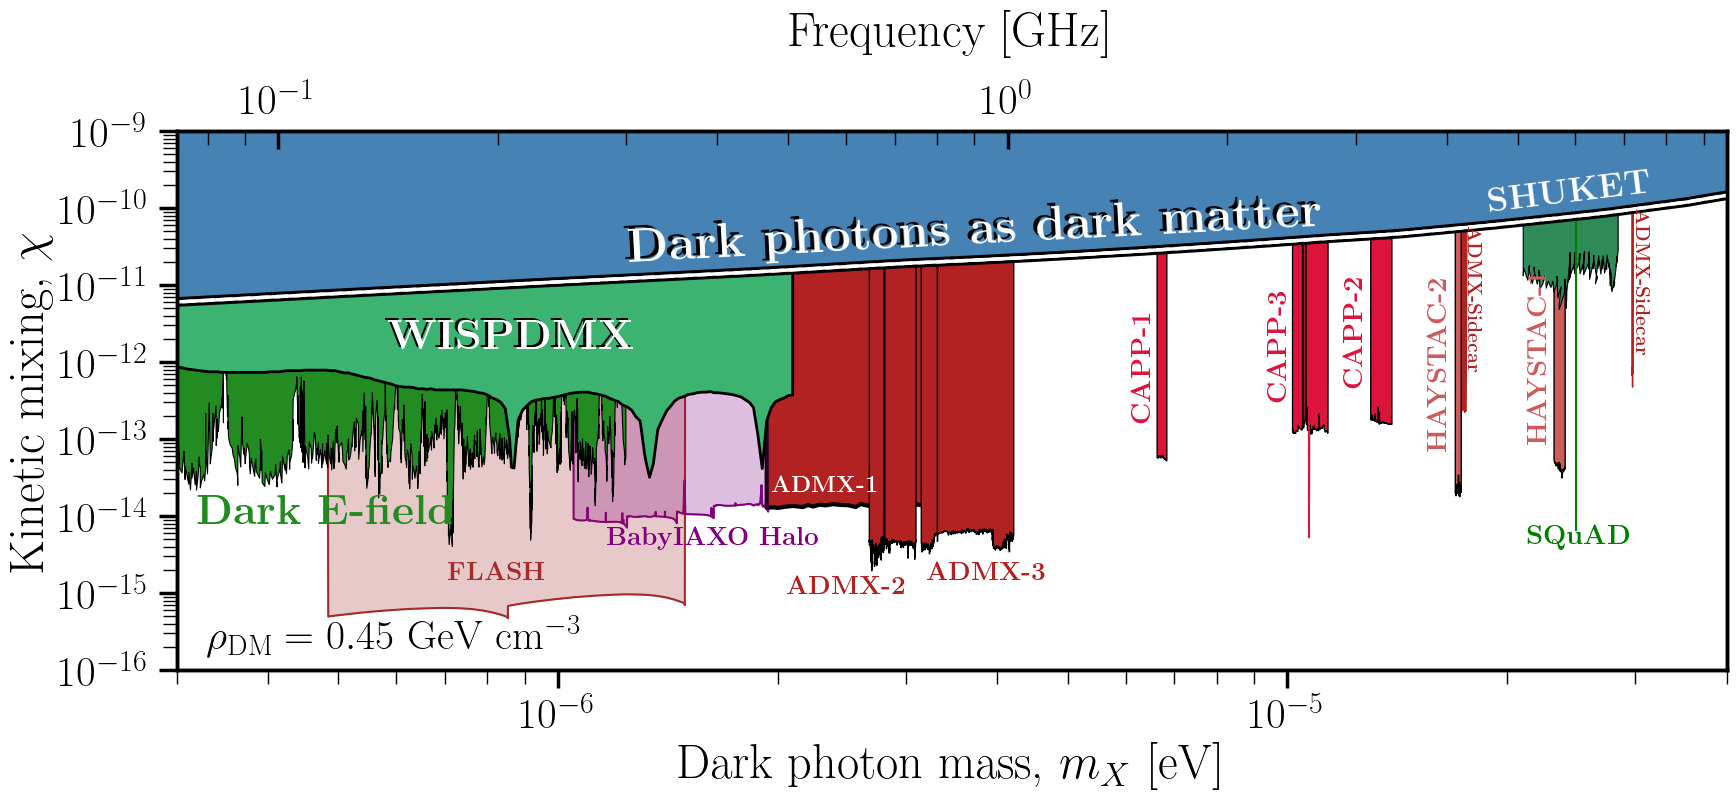

In [36]:
m_min = 3e-7
m_max = 4e-5
fig,ax = FigSetup(m_min=m_min,m_max=m_max,chi_min=1e-16,chi_max=1e-9,\
                  FrequencyLabels=False,FrequencyAxis=True,upper_tickdir='in',\
                  Shape='Custom',width=20,height=7,f_rescale=1e9,tfs=31,lfs=35)
plt.title(r'Frequency [GHz]',ha='center',fontsize=35,pad=27)


DarkMatter(ax,text_on=False,Arias_col='steelblue')
StellarBounds(ax,text_on=False)
Tokyo(ax,text_on=False,col='darkgreen')
SHUKET(ax,text_on=False,edge_on=True,col='seagreen')
DarkEfield(ax,text_on=False,edge_on=True,col='ForestGreen')
WISPDMX(ax,text_on=False,edge_on=True,col='mediumseagreen',lw=2)
SQuAD(ax,text_on=False,col=[0,0.5,0],point_on=False,lw=1.5)

plt.gcf().text(0.35*(1-0.005),0.695*(1+0.005),r'{\bf Dark photons as dark matter}',color='k',fontsize=35,rotation=3)
plt.gcf().text(0.35,0.695,r'{\bf Dark photons as dark matter}',color='w',fontsize=35,rotation=3)


y2 = ax.get_ylim()[1]

HAYSTAC_col = 'indianred'
CAPP_col = 'crimson'
QUAX_col = 'orangered'
ADMX_col = 'firebrick'

# ADMX
costh = sqrt(0.019)
B = 7.6
dat = loadtxt("limit_data/AxionPhoton/ADMX.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=ADMX_col,zorder=0.1,lw=3)

B = 6.8
dat = loadtxt("limit_data/AxionPhoton/ADMX2018.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=ADMX_col,zorder=0.1)

B = 7.6
dat = loadtxt("limit_data/AxionPhoton/ADMX2019_1.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=ADMX_col,zorder=0.1)

B = 7.6
dat = loadtxt("limit_data/AxionPhoton/ADMX2019_2.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=ADMX_col,zorder=0.1)

B = 7.6
dat = loadtxt("limit_data/AxionPhoton/ADMX2021.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=ADMX_col,zorder=0.1)

B = 3.11
dat = loadtxt("limit_data/AxionPhoton/ADMX_Sidecar_AC.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=ADMX_col,facecolor=ADMX_col,zorder=0.1)


B = 5.0
dat = loadtxt("limit_data/AxionPhoton/ADMX_SLIC.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=ADMX_col,facecolor=ADMX_col,zorder=100)



B = 9
dat = loadtxt("limit_data/AxionPhoton/HAYSTAC_highres.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=HAYSTAC_col,zorder=0.1)
dat = loadtxt("limit_data/AxionPhoton/HAYSTAC_2020_highres.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=HAYSTAC_col,zorder=0.1)


# CAPP
B = 7.3
dat = loadtxt("limit_data/AxionPhoton/CAPP-1.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=CAPP_col,zorder=0.1)

B = 7.8
dat = loadtxt("limit_data/AxionPhoton/CAPP-2.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=CAPP_col,zorder=0.1)

B = 7.9
dat = loadtxt("limit_data/AxionPhoton/CAPP-3.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='k',facecolor=CAPP_col,zorder=0.1)

# CAPP-3 [KSVZ]
dat_min = dat[argmin(dat[:,1]),:]
dat_min[1] = dat_min[1]*costh/sqrt(0.2)
plt.plot([dat_min[0],dat_min[0]],[1e-10,dat_min[1]],'-',color=CAPP_col,lw=1.5,zorder=0.2)


# B = 8.1
# dat = loadtxt("limit_data/AxionPhoton/QUAX.txt")
# dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
# plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=QUAX_col,zorder=0.1)



# FLASH
B = 2.5
dat = loadtxt("limit_data/AxionPhoton/Projections/FLASH_Axions_gagg_100mk.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.plot(dat[:,0],dat[:,1],linewidth=1.5,color='Brown',zorder=0)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='Brown',facecolor='Brown',alpha=0.25,zorder=0.1)

# BabyIAXO Halo
B = 7.3
dat = loadtxt("limit_data/AxionPhoton/Projections/BabyIAXO_prospect_4cavs.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.plot(dat[:,0],dat[:,1],linewidth=1.5,color='purple',zorder=0)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='purple',facecolor='purple',alpha=0.25,zorder=0.1)


plt.gcf().text(0.23*(1-0.005),0.57*(1+0.005),r'{\bf WISPDMX}',color='k')
plt.gcf().text(0.23,0.57,r'{\bf WISPDMX}',color='w')

plt.gcf().text(0.135,0.32,r'{\bf Dark E-field}',color='ForestGreen')


plt.gcf().text(0.422,0.365,r'{\bf ADMX-1}',color='w',fontsize=17)
plt.gcf().text(0.43,0.22,r'{\bf ADMX-2}',color=ADMX_col,fontsize=19)
plt.gcf().text(0.5,0.24,r'{\bf ADMX-3}',color=ADMX_col,fontsize=19)

plt.gcf().text(0.769,0.54,r'{\bf ADMX-Sidecar}',color=ADMX_col,fontsize=14,rotation=-90)
plt.gcf().text(0.853,0.565,r'{\bf ADMX-Sidecar}',color=ADMX_col,fontsize=14,rotation=-90)

plt.gcf().text(0.602,0.47,r'{\bf CAPP-1}',color=CAPP_col,fontsize=20,rotation=90)
plt.gcf().text(0.708,0.52,r'{\bf CAPP-2}',color=CAPP_col,fontsize=20,rotation=90)
plt.gcf().text(0.67,0.50,r'{\bf CAPP-3}',color=CAPP_col,fontsize=20,rotation=90)


plt.gcf().text(0.8,0.44,r'{\bf HAYSTAC-1}',color=HAYSTAC_col,fontsize=20,rotation=90)
plt.gcf().text(0.75,0.43,r'{\bf HAYSTAC-2}',color=HAYSTAC_col,fontsize=20,rotation=90)


plt.gcf().text(0.8,0.29,r'{\bf SQuAD}',color='g',fontsize=20)
plt.gcf().text(0.78,0.765,r'{\bf SHUKET}',color='w',fontsize=25,rotation=7)

plt.gcf().text(0.14,0.14,r'$\rho_{\rm DM} = 0.45$ GeV cm$^{-3}$',fontsize=30,ha='left')

plt.gcf().text(0.26,0.24,r'{\bf FLASH}',color='Brown',fontsize=19)
plt.gcf().text(0.34,0.29,r'{\bf BabyIAXO Halo}',color='purple',fontsize=19)


MySaveFig(fig,'DarkPhoton_Haloscopes_Closeup')

/tmp/ipykernel_23610/1333341744.py:31: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']


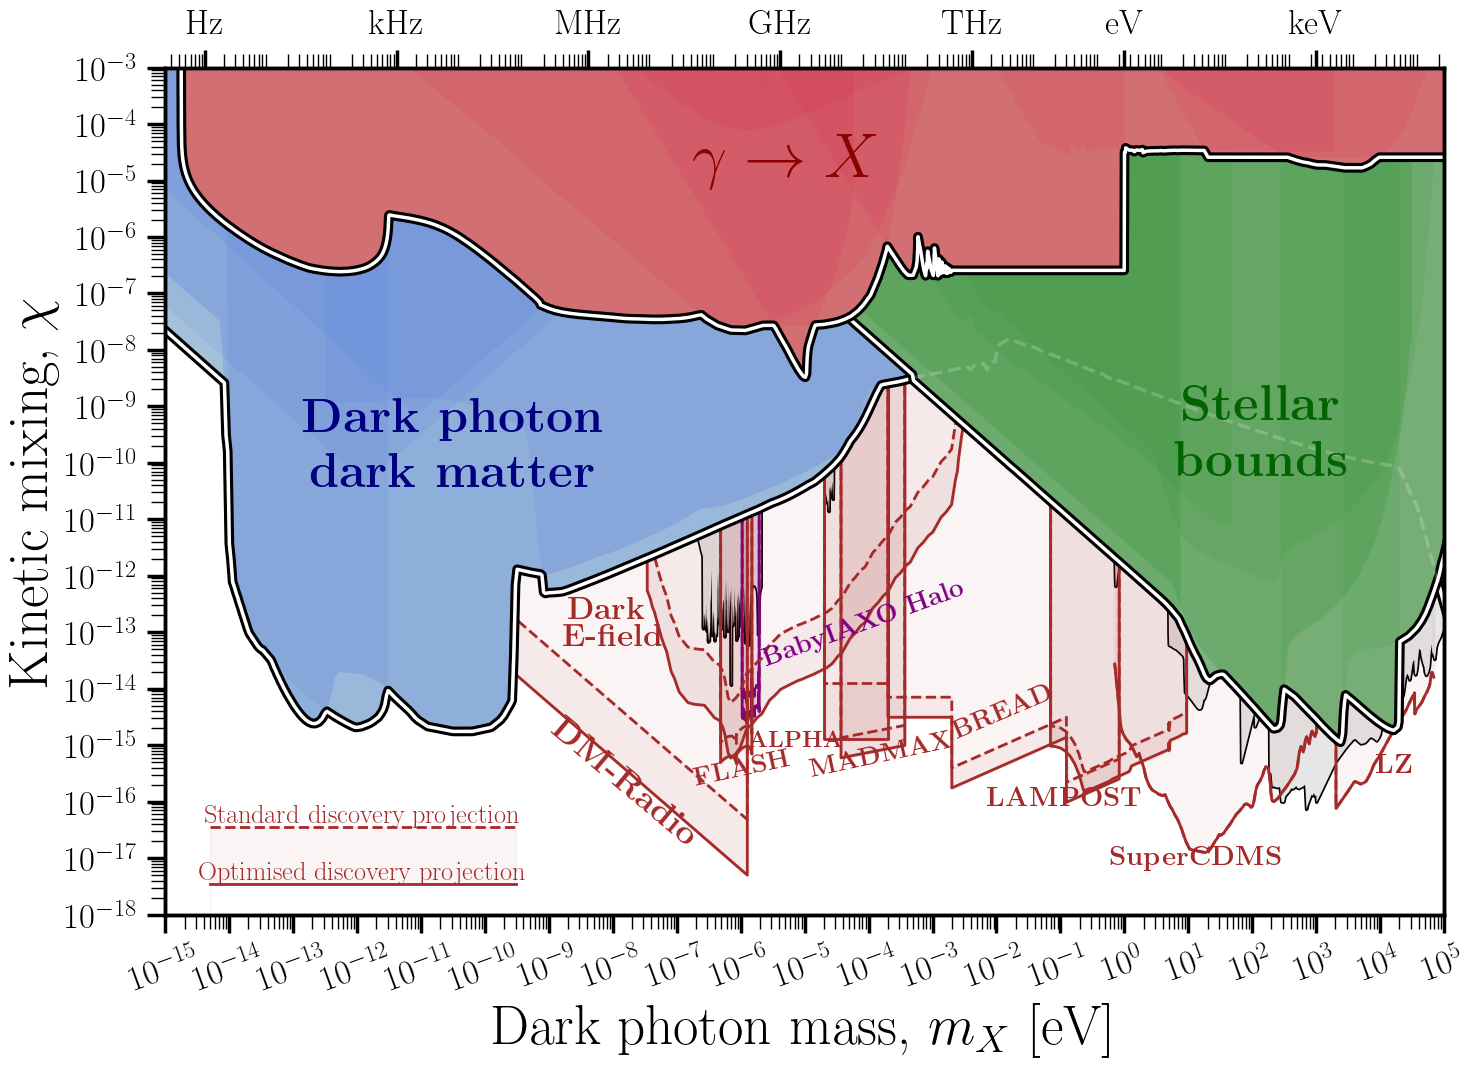

In [19]:
fig,ax = FigSetup(m_min=1e-15,chi_max=1e-3)
y2 = 1

def PlotLimSimple(filename,col,zo,alph,delimiter='\t',rescale_m=False):
    dat = loadtxt("limit_data/DarkPhoton/"+filename+'.txt',delimiter=delimiter)
    if rescale_m:
        dat[:,1] = dat[:,1]/dat[:,0]
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=zo,alpha=alph)
    return

zo = 0.25
alph = 0.1
col = 'crimson'
PlotLimSimple('Cavendish',col,zo,alph)
PlotLimSimple('PlimptonLawton',col,zo,alph)
PlotLimSimple('Spectroscopy',col,zo,alph)
PlotLimSimple('AFM',col,zo,alph)
PlotLimSimple('TEXONO',col,zo,alph)
PlotLimSimple('CROWS',col,zo,alph)
PlotLimSimple('LSW_UWA',col,zo,0.01)
PlotLimSimple('LSW_ADMX',col,zo,0.01)
PlotLimSimple('ALPS',col,zo,alph)
PlotLimSimple('Jupiter',col,zo,alph)
PlotLimSimple('Earth',col,zo,alph)
PlotLimSimple('Crab',col,zo,alph)
PlotLimSimple('SPring-8',col,zo,alph)
PlotLimSimple('COBEFIRAS',col,zo,alph,delimiter=',')

zo = 0.15
alph = 0.1
col = 'ForestGreen'
PlotLimSimple('Solar',col,zo,0.2)
PlotLimSimple('Solar-Global',col,zo,0.2,rescale_m=True)
PlotLimSimple('RG',col,zo,0.1)
PlotLimSimple('HB',col,zo,0.1)
PlotLimSimple('CAST',col,zo,0.1)
PlotLimSimple('SHIPS',col,zo,0.1,rescale_m=True)


zo = 0.01
alph = 0.1
col = 'royalblue'
PlotLimSimple('Cosmology_Witte_inhomogeneous',col,zo,0.2)
PlotLimSimple('Cosmology_Caputo_HeII',col,zo,alph,delimiter=',')
PlotLimSimple('Cosmology_Arias',col,zo,alph)
PlotLimSimple('LeoT',col,zo,alph)
PlotLimSimple('IGM',col,zo,alph)

dat = loadtxt('limit_data/DarkPhoton/DP_Combined_Stellar.txt')
plt.plot(dat[:,0],dat[:,1],'-',color='w',alpha=1,zorder=0.16,lw=2.5,path_effects=pek)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col_alpha('darkgreen',0.5),zorder=0.11)

dat = loadtxt('limit_data/DarkPhoton/DP_Combined_Laboratory.txt')
plt.plot(dat[:,0],dat[:,1],'-',color='w',alpha=1,zorder=0.26,lw=2.5,path_effects=pek)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col_alpha('firebrick',0.6),zorder=0.2)

dat = loadtxt('limit_data/DarkPhoton/DM_combined.txt')
zo =0.3
plt.plot(dat[:,0],dat[:,1],'-',color='w',alpha=1,zorder=0.05,lw=2.5,path_effects=pek)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col_alpha('steelblue',0.5),zorder=0)
plt.plot(dat[:,0],dat[:,1],'--',color='w',alpha=0.2,zorder=0.5,lw=2.5)

dat = loadtxt('limit_data/DarkPhoton/DP_Combined_DarkMatterSearches.txt')
plt.plot(dat[:,0],dat[:,1],'-',color='k',alpha=1,zorder=-1,lw=2.5)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col_alpha('k',0.1),zorder=-1)

dat = loadtxt('limit_data/DarkPhoton/Projections/ALPHA.txt')
chi_a = dat[:,1]*sqrt(1/3/0.0036)
plt.plot(dat[:,0],dat[:,1],'-',lw=2,color='Brown',zorder=-1)
plt.plot(dat[:,0],chi_a,'--',lw=2,color='Brown',zorder=-1)
plt.fill_between(dat[:,0],chi_a,y2=dat[:,1],lw=2,color='Brown',zorder=-1,alpha=0.05)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,color='Brown',alpha=0.1,zorder=-1,lw=2.5)

'''
dat  = loadtxt('limit_data/DarkPhoton/Projections/FLASH_DP_2_100mk.txt')
chi_a = loadtxt('limit_data/DarkPhoton/Projections/FLASH_DP_1_100mk.txt')[:,1]
plt.plot(dat[:,0],dat[:,1],'-',lw=2,color='Brown',zorder=-1)
plt.plot(dat[:,0],chi_a,'--',lw=2,color='Brown',zorder=-1)
plt.plot([9e-7,2e-6],[3e-16,1e-16],'-',lw=2.5,color='Brown')
plt.fill_between(dat[:,0],chi_a,y2=dat[:,1],lw=2,color='Brown',zorder=-1,alpha=0.05)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,color='Brown',alpha=0.1,zorder=-1,lw=2.5)
'''

# BabyIAXO
costh = sqrt(0.019)
B = 2.5
dat = loadtxt("limit_data/AxionPhoton/Projections/BabyIAXO_prospect_4cavs.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
chi_a = dat[:,1]*sqrt(2/3/0.13)
plt.plot(dat[:,0],dat[:,1],'-',lw=2,color='purple',zorder=-1)
plt.plot(dat[:,0],chi_a,'--',lw=2,color='purple',zorder=-1)
plt.fill_between(dat[:,0],chi_a,y2=dat[:,1],lw=2,color='purple',zorder=-1,alpha=0.05)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,color='purple',alpha=0.1,zorder=-1,lw=2.5)

# FLASH
costh = sqrt(0.019)
B = 2.5
dat = loadtxt("limit_data/AxionPhoton/Projections/FLASH_Axions_gagg_100mk.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
chi_a = dat[:,1]*sqrt(2/3/0.13)
plt.plot(dat[:,0],dat[:,1],'-',lw=2,color='Brown',zorder=-1)
plt.plot(dat[:,0],chi_a,'--',lw=2,color='Brown',zorder=-1)
plt.fill_between(dat[:,0],chi_a,y2=dat[:,1],lw=2,color='Brown',zorder=-1,alpha=0.05)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,color='Brown',alpha=0.1,zorder=-1,lw=2.5)

dat = loadtxt('limit_data/DarkPhoton/Projections/MADMAX.txt')
chi_a = dat[:,1]*sqrt(2/3/0.13)
plt.plot(dat[:,0],dat[:,1],'-',lw=2,color='Brown',zorder=-1)
plt.plot(dat[:,0],chi_a,'--',lw=2,color='Brown',zorder=-1)
plt.fill_between(dat[:,0],chi_a,y2=dat[:,1],lw=2,color='Brown',zorder=-1,alpha=0.05)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,color='Brown',alpha=0.1,zorder=-1,lw=2.5)

dat = loadtxt('limit_data/DarkPhoton/Projections/LAMPOST.txt')
chi_a = dat[:,1]*sqrt(2/3/0.13)
plt.plot(dat[:,0],dat[:,1],'-',lw=2,color='Brown',zorder=-1)
plt.plot(dat[:,0],chi_a,'--',lw=2,color='Brown',zorder=-1)
plt.fill_between(dat[:,0],chi_a,y2=dat[:,1],lw=2,color='Brown',zorder=-1,alpha=0.05)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,color='Brown',alpha=0.1,zorder=-1,lw=2.5)

dat = loadtxt('limit_data/DarkPhoton/Projections/SuperCDMS.txt')
dat[:,1] = dat[:,1]*sqrt(0.3/0.45)
plt.plot(dat[:,0],dat[:,1],'--',lw=2,color='Brown',zorder=-1)
plt.plot(dat[:,0],dat[:,1],'-',lw=2,color='Brown',zorder=-1)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,color='Brown',alpha=0.05,zorder=-1,lw=2.5)

dat = loadtxt('limit_data/DarkPhoton/Projections/LZ.txt')
dat[:,1] = sqrt(dat[:,1])
dat[:,1] = dat[:,1]*sqrt(0.3/0.45)
plt.plot(dat[:,0],dat[:,1],'--',lw=2,color='Brown',zorder=-1)
plt.plot(dat[:,0],dat[:,1],'-',lw=2,color='Brown',zorder=-1)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,color='Brown',alpha=0.05,zorder=-1,lw=2.5)


dat = loadtxt('limit_data/DarkPhoton/Projections/DMRadio.txt')
dat[:,1] = dat[:,1]/sqrt(1/3) # <--- need to correct for the fact they don't account for the polarisation to begin with
chi_a = dat[:,1]*sqrt(1/3/0.0036)
plt.plot(dat[:,0],dat[:,1],'-',lw=2,color='Brown',zorder=-1)
plt.plot(dat[:,0],chi_a,'--',lw=2,color='Brown',zorder=-1)
plt.fill_between(dat[:,0],chi_a,y2=dat[:,1],lw=2,color='Brown',zorder=-1,alpha=0.05)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,color='Brown',alpha=0.05,zorder=-1,lw=2.5)

dat = loadtxt('limit_data/DarkPhoton/Projections/DarkEfield.txt')
dat[:,1] = dat[:,1]*sqrt(1.64/5) # convert from 5 sigma CL to 95%
chi_a = dat[:,1]*sqrt(1/3/0.0036)
plt.plot(dat[:,0],dat[:,1],'-',lw=2,color='Brown',zorder=-1)
plt.plot(dat[:,0],chi_a,'--',lw=2,color='Brown',zorder=-1,solid_capstyle='round')
plt.fill_between(dat[:,0],chi_a,y2=dat[:,1],lw=2,color='Brown',zorder=-1,alpha=0.05)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,color='Brown',alpha=0.05,zorder=-1,lw=2.5)


dat = loadtxt('limit_data/DarkPhoton/Projections/BREAD.txt')
chi_a = dat[:,1]*sqrt(2/3/0.13)
plt.plot(dat[:,0],dat[:,1],'-',lw=2,color='Brown',zorder=-1)
plt.plot(dat[:,0],chi_a,'--',lw=2,color='Brown',zorder=-1,solid_capstyle='round')
plt.fill_between(dat[:,0],chi_a,y2=dat[:,1],lw=2,color='Brown',zorder=-1,alpha=0.05)
plt.fill_between(dat[:,0],dat[:,1],y2=y2,color='Brown',alpha=0.05,zorder=-1,lw=2.5)

# dat = loadtxt('limit_data/DarkPhoton/Projections/AharonovBohm.txt')
# plt.plot(dat[:,0],dat[:,1],'--',lw=3,color='brown',zorder=-1)
# plt.fill_between(dat[:,0],dat[:,1],y2=y2,color='gold',alpha=0.05,zorder=-1,lw=2.5)

xleg = [5e-15,3e-10]
yleg = [0.35e-17,0.35e-16]
plt.fill_between([xleg[0],xleg[1],xleg[1],xleg[0]],[yleg[0],yleg[0],yleg[1],yleg[1]],color='Brown',alpha=0.05)
plt.plot(xleg,[yleg[1],yleg[1]],'--',lw=2,color='Brown')
plt.plot(xleg,[yleg[0],yleg[0]],'-',lw=2,color='Brown')
plt.text(exp(sum(log(xleg))/2),yleg[1],'Standard discovery projection',color='Brown',fontsize=19,ha='center',va='bottom')
plt.text(exp(sum(log(xleg))/2),yleg[0],'Optimised discovery projection',color='Brown',fontsize=19,ha='center',va='bottom')

plt.gcf().text(0.3,0.55,r'{\bf Dark photon}',color='navy',ha='center',fontsize=35)
plt.gcf().text(0.3,0.5,r'{\bf dark matter}',color='navy',ha='center',fontsize=35)
plt.gcf().text(0.5,0.78,r'$\gamma \rightarrow X$',color='darkred',ha='center',fontsize=45)
plt.gcf().text(0.79,0.56,r'{\bf Stellar}',color='darkgreen',ha='center',fontsize=36)
plt.gcf().text(0.79,0.51,r'{\bf bounds}',color='darkgreen',ha='center',fontsize=36)

plt.gcf().text(0.4,0.224,r'{\bf DM-Radio}',color='Brown',fontsize=25,rotation=-40,rotation_mode='anchor',ha='center')
plt.gcf().text(0.393,0.38,r'{\bf Dark}',color='Brown',fontsize=23,rotation=0,rotation_mode='anchor',ha='center')
plt.gcf().text(0.397,0.355,r'{\bf E-field}',color='Brown',fontsize=23,rotation=0,rotation_mode='anchor',ha='center')
plt.gcf().text(0.507,0.263,r'{\bf ALPHA}',color='Brown',fontsize=17,rotation=0,rotation_mode='anchor',ha='center')
plt.gcf().text(0.56,0.25,r'{\bf MADMAX}',color='Brown',fontsize=19,rotation=12,rotation_mode='anchor',ha='center')
plt.gcf().text(0.475,0.237,r'{\bf FLASH}',color='Brown',fontsize=19,rotation=12,rotation_mode='anchor',ha='center')
plt.gcf().text(0.55,0.37,r'{\bf BabyIAXO Halo}',color='purple',fontsize=19,rotation=20,rotation_mode='anchor',ha='center')
plt.gcf().text(0.635,0.29,r'{\bf BREAD}',color='Brown',fontsize=19,rotation=23,rotation_mode='anchor',ha='center')

plt.gcf().text(0.67,0.21,r'{\bf LAMPOST}',color='Brown',fontsize=20,rotation=0,rotation_mode='anchor',ha='center')
plt.gcf().text(0.75,0.155,r'{\bf SuperCDMS}',color='Brown',fontsize=20,rotation=0,rotation_mode='anchor',ha='center')
plt.gcf().text(0.87,0.24,r'{\bf LZ}',color='Brown',fontsize=20,rotation=0,rotation_mode='anchor',ha='center')


#plt.fill_between([6.5e-15,2.9e-11],[1e-18,1e-18],y2=1,color='gray',edgecolor='none',zorder=-100,alpha=0.05)


MySaveFig(fig,'DarkPhoton_with_Projections')

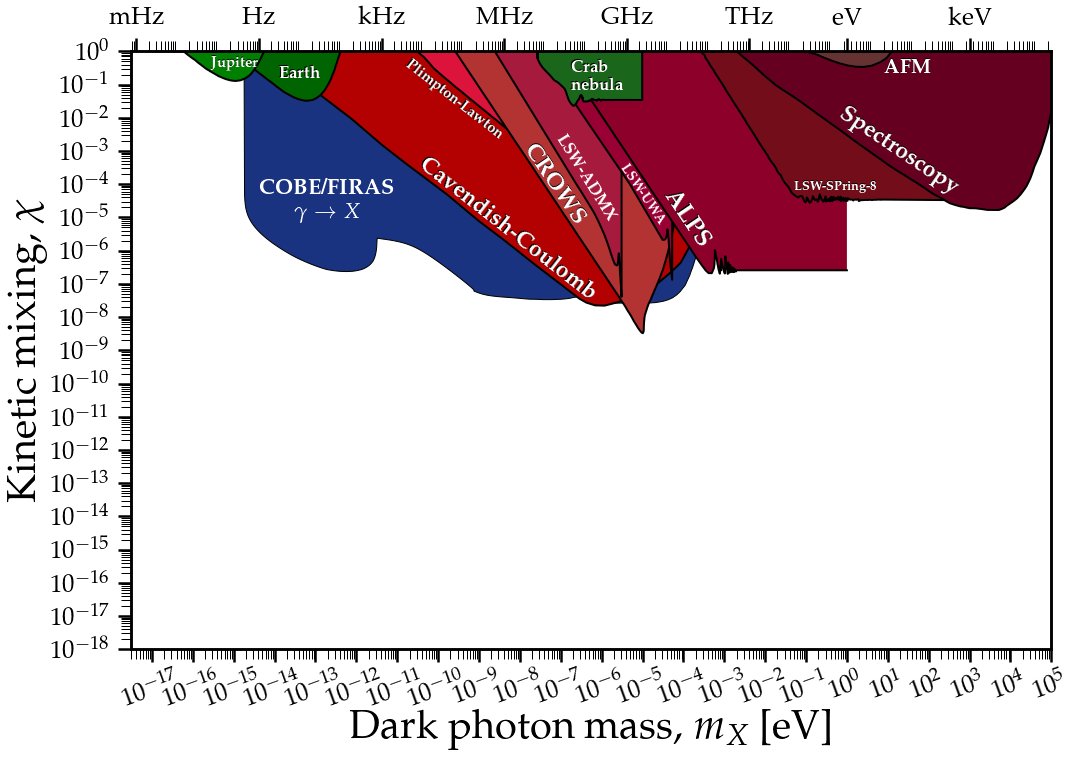

In [5]:
fig,ax = FigSetup()
LSW(ax)
Coulomb(ax)
COBEFIRAS(ax)
Jupiter(ax)
Earth(ax)
Crab(ax)
MySaveFig(fig,'DarkPhoton_JustPhotonSearches')

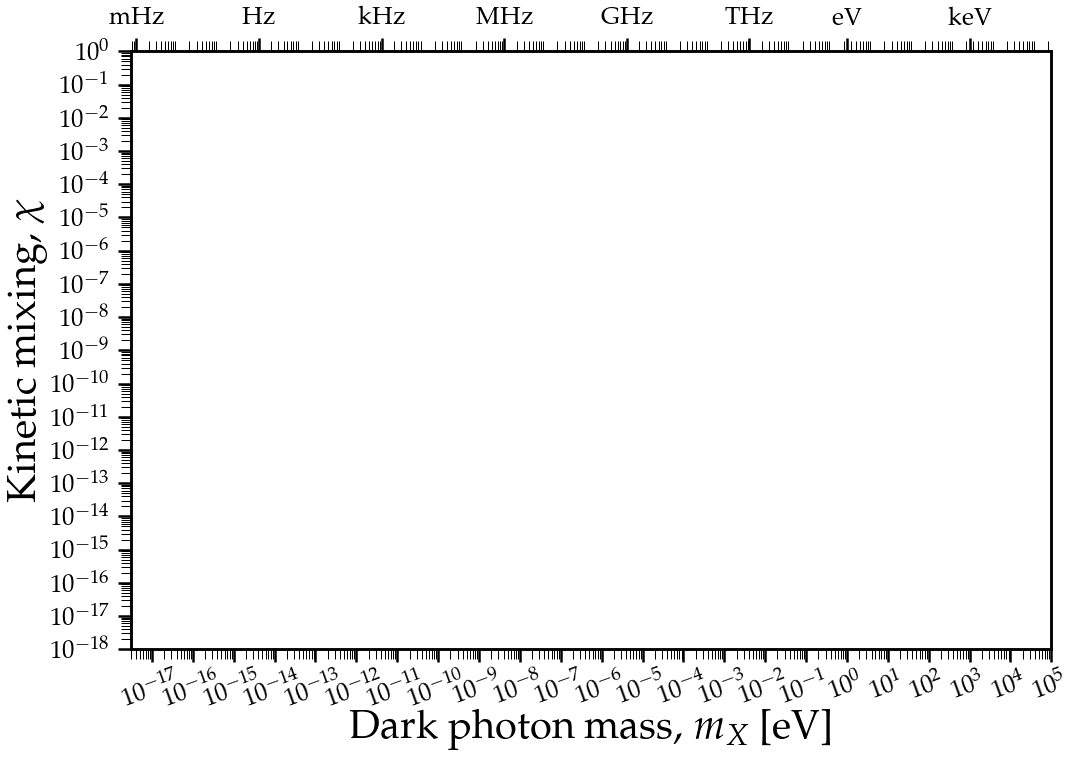

In [6]:
fig,ax = FigSetup()

MySaveFig(fig,'DarkPhoton_blank')

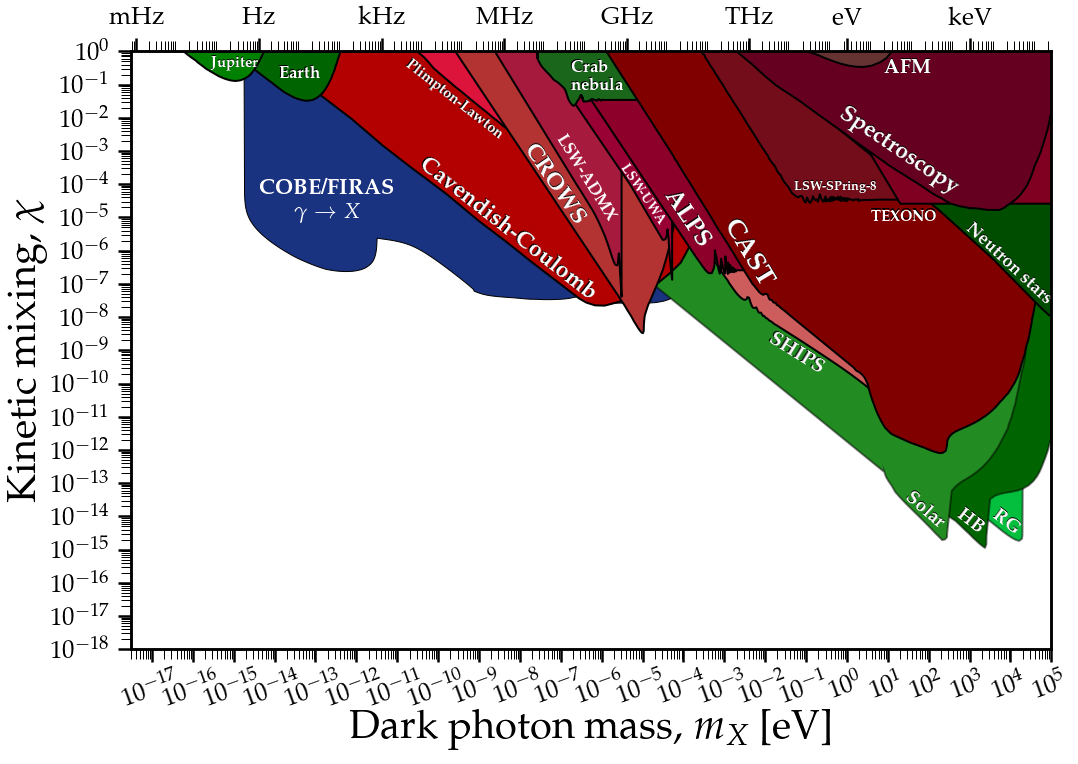

In [7]:
fig,ax = FigSetup()
LSW(ax)
CAST(ax)
SHIPS(ax)
Coulomb(ax)
TEXONO(ax)
StellarBounds(ax)
COBEFIRAS(ax)
Jupiter(ax)
Earth(ax)
Crab(ax)
NeutronStarCooling(ax)
MySaveFig(fig,'DarkPhoton_PhotonSearches_and_StellarBounds')

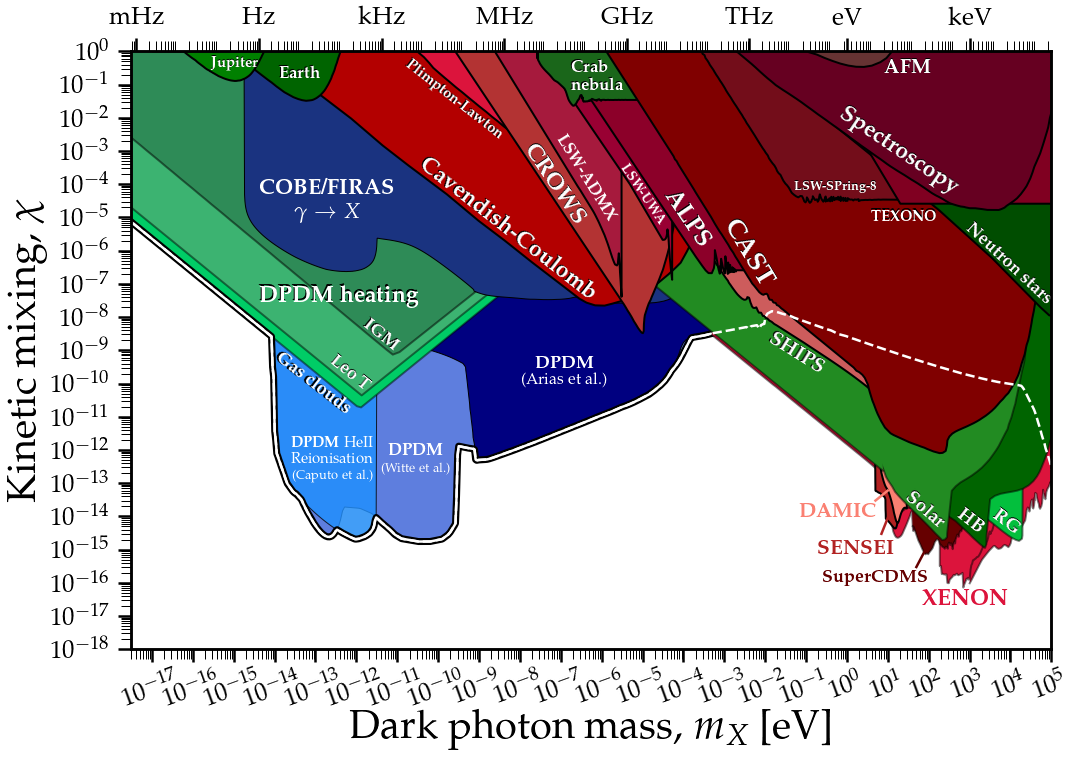

In [8]:
fig,ax = FigSetup()
DarkMatter(ax)
LSW(ax)
CAST(ax)
SHIPS(ax)
Coulomb(ax)
TEXONO(ax)
Xenon(ax)
DAMIC(ax)
SENSEI(ax)
SuperCDMS(ax)
StellarBounds(ax)
COBEFIRAS(ax)
Jupiter(ax)
Earth(ax)
Crab(ax)
IGM(ax)
LeoT(ax)
GasClouds(ax)
NeutronStarCooling(ax)
MySaveFig(fig,'DarkPhoton_Semicomplete')

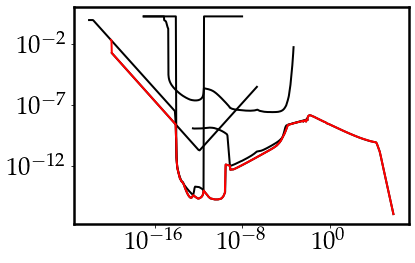

In [9]:
dat1 = loadtxt("limit_data/DarkPhoton/GasClouds.txt")
dat2 = loadtxt("limit_data/DarkPhoton/Cosmology_Witte_inhomogeneous.txt")
dat3 = loadtxt("limit_data/DarkPhoton/COBEFIRAS.txt",delimiter=',')
dat4 = loadtxt("limit_data/DarkPhoton/Cosmology_Caputo_HeII.txt",delimiter=',')
dat5 = loadtxt("limit_data/DarkPhoton/Cosmology_Arias.txt")

plt.plot(dat1[:,0],dat1[:,1],color='k',alpha=1,zorder=0.5,lw=2)
plt.plot(dat2[:,0],dat2[:,1],color='k',alpha=1,zorder=0.5,lw=2)
plt.plot(dat3[:,0],dat3[:,1],color='k',alpha=1,zorder=0.5,lw=2)
plt.plot(dat4[:,0],dat4[:,1],color='k',alpha=1,zorder=0.5,lw=2)
plt.plot(dat5[:,0],dat5[:,1],color='k',alpha=1,zorder=0.5,lw=2)

mmin = 1e-20
mmax = 698203.561630161
mvals = logspace(log10(mmin),log10(mmax),1000)

chi1 = 10**interp(log10(mvals),log10(dat1[:,0]),log10(dat1[:,1]))
chi1[mvals<dat1[0,0]] = inf
chi1[mvals>dat1[-1,0]] = inf

chi2 = interp(mvals,dat2[:,0],dat2[:,1])
chi2[mvals<dat2[0,0]] = inf
chi2[mvals>dat2[-1,0]] = inf

chi3 = interp(mvals,dat3[:,0],dat3[:,1])
chi3[mvals<dat3[0,0]] = inf
chi3[mvals>dat3[-1,0]] = inf

chi4 = interp(mvals,dat4[:,0],dat4[:,1])
chi4[mvals<dat4[0,0]] = inf
chi4[mvals>dat4[-1,0]] = inf

chi5 = interp(mvals,dat5[:,0],dat5[:,1])
chi5[mvals<dat5[0,0]] = inf
chi5[mvals>dat5[-1,0]] = inf

chi = amin(column_stack((chi1,chi2,chi3,chi4,chi5)),1)

plt.plot(mvals,chi,color='r',alpha=1,zorder=0.5,lw=2)

savetxt('limit_data/DarkPhoton/DM_combined.txt',column_stack((mvals,chi)))

plt.yscale('log')
plt.xscale('log')


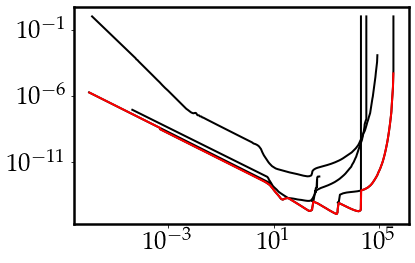

In [10]:
dat1 = loadtxt("limit_data/DarkPhoton/Solar.txt")
dat2 = loadtxt("limit_data/DarkPhoton/RG.txt")
dat3 = loadtxt("limit_data/DarkPhoton/HB.txt")
dat4 = loadtxt("limit_data/DarkPhoton/CAST.txt")
dat5 = loadtxt("limit_data/DarkPhoton/Solar-Global.txt")
dat6 = loadtxt("limit_data/DarkPhoton/XENON1T_Solar_S2.txt")

dat5[:,1] = dat5[:,1]/dat5[:,0]


dats = [dat1,dat2,dat3,dat4,dat5,dat6]
for dat in dats:
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=0.5,lw=2)

mmin = 1e-9
mmax = 1e7
mvals = logspace(log10(mmin),log10(mmax),1000)

chi = zeros(shape=1000)
for dat in dats:
    chi1 = 10**interp(log10(mvals),log10(dat[:,0]),log10(dat[:,1]))
    chi1[mvals<amin(dat[:,0])] = inf
    chi1[mvals>amax(dat[:,0])] = inf
    chi = column_stack((chi,chi1))
chi = chi[:,1:]

chi = amin(chi,1)

plt.plot(mvals,chi,color='r',alpha=1,zorder=0.5,lw=2)

savetxt('limit_data/DarkPhoton/DP_Combined_Stellar.txt',column_stack((mvals,chi)))

plt.yscale('log')
plt.xscale('log')


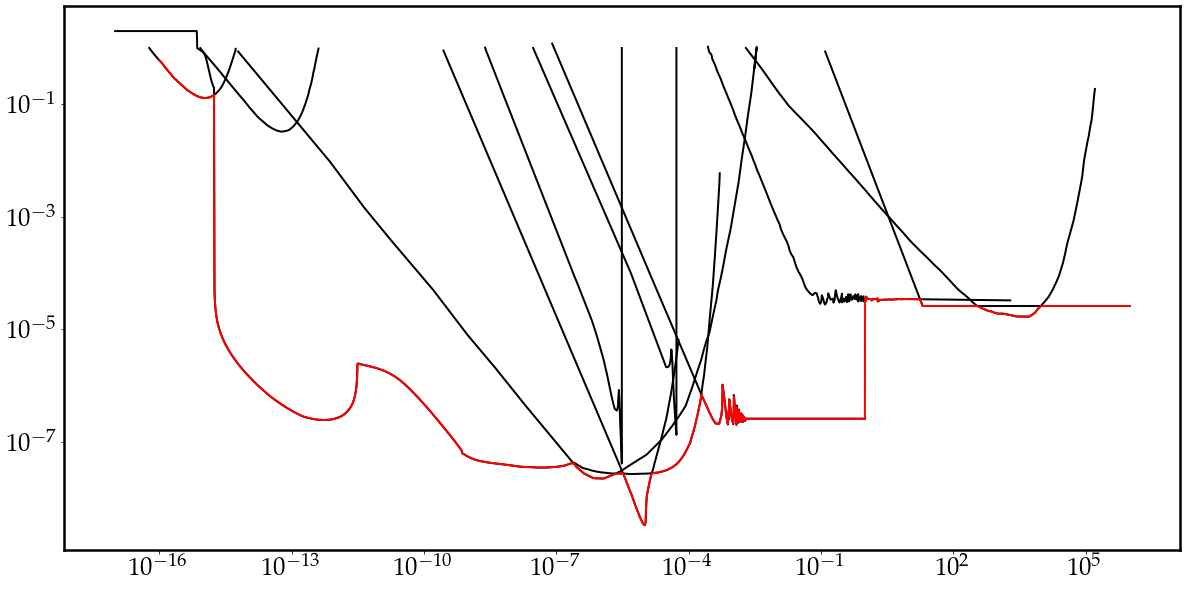

In [11]:
plt.figure(figsize=(20,10))
dat1 = loadtxt("limit_data/DarkPhoton/Cavendish.txt")
dat2 = loadtxt("limit_data/DarkPhoton/Jupiter.txt")
dat3 = loadtxt("limit_data/DarkPhoton/Earth.txt")
dat4 = loadtxt("limit_data/DarkPhoton/TEXONO.txt")
dat5 = loadtxt("limit_data/DarkPhoton/ALPS.txt")
dat6 = loadtxt("limit_data/DarkPhoton/Spectroscopy.txt")
dat7 = loadtxt("limit_data/DarkPhoton/CROWS.txt")
dat8 = loadtxt("limit_data/DarkPhoton/LSW_UWA.txt")
dat9 = loadtxt("limit_data/DarkPhoton/LSW_ADMX.txt")
dat10 = loadtxt("limit_data/DarkPhoton/COBEFIRAS.txt",delimiter=',')
dat11 = loadtxt("limit_data/DarkPhoton/SPring-8.txt")


dats = [dat1,dat2,dat3,dat4,dat5,dat6,dat7,dat8,dat9,dat10,dat11]
for dat in dats:
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=0.5,lw=2)

mmin = 1e-16
mmax = 1e7
mvals = logspace(log10(mmin),log10(mmax),5000)

chi = zeros(shape=5000)
for dat in dats:
    chi1 = 10**interp(log10(mvals),log10(dat[:,0]),log10(dat[:,1]))
    chi1[mvals<amin(dat[:,0])] = inf
    chi1[mvals>amax(dat[:,0])] = inf
    chi = column_stack((chi,chi1))
chi = chi[:,1:]

chi = amin(chi,1)

plt.plot(mvals,chi,color='r',alpha=1,zorder=0.5,lw=2)

savetxt('limit_data/DarkPhoton/DP_Combined_Laboratory.txt',column_stack((mvals,chi)))

plt.yscale('log')
plt.xscale('log')


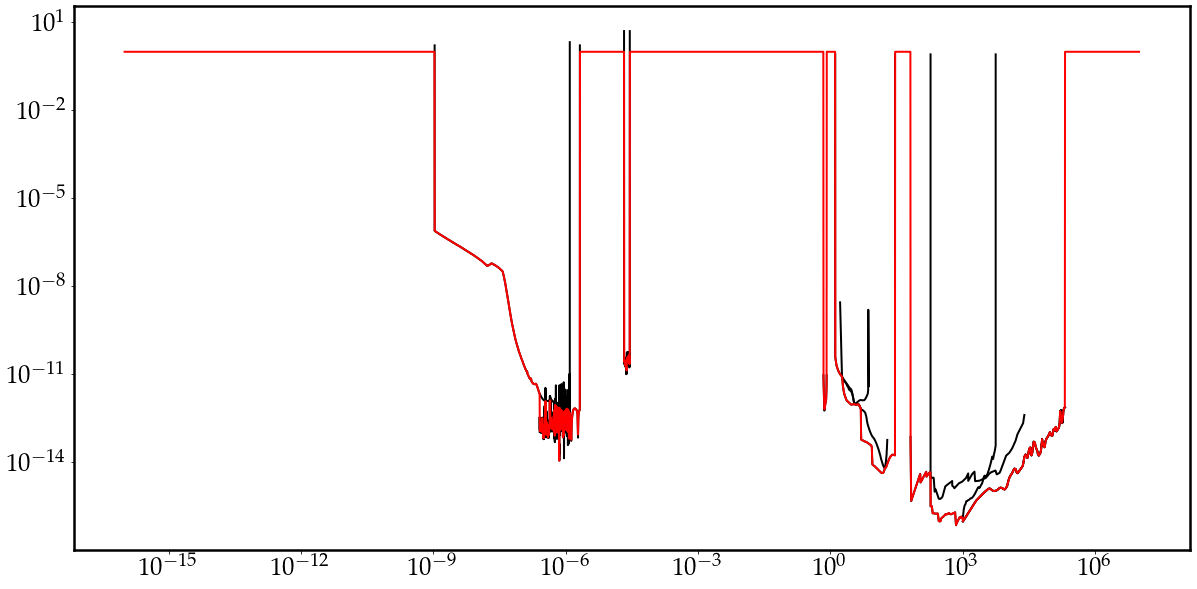

In [12]:
plt.figure(figsize=(20,10))
dat1 = loadtxt("limit_data/DarkPhoton/DAMIC.txt")
dat1[:,1] = dat1[:,1]*sqrt(0.3/0.45)

dat2 = loadtxt("limit_data/DarkPhoton/FUNK.txt")
dat2[:,1] = dat2[:,1]*sqrt(0.3/0.45)*sqrt(2/3/0.27)


dat3 = loadtxt("limit_data/DarkPhoton/SENSEI.txt")
dat3[:,1] = dat3[:,1]*sqrt(0.3/0.45)

dat4 = loadtxt("limit_data/DarkPhoton/WISPDMX.txt")
dat4[:,1] = dat4[:,1]*sqrt(0.3/0.45)*sqrt(1/3/0.081)

dat5 = loadtxt("limit_data/DarkPhoton/DarkEField.txt")
dat5[:,1] = dat5[:,1]*sqrt(0.3/0.45)*sqrt(1/3/0.049)

dat6 = loadtxt("limit_data/DarkPhoton/XENON1T.txt")
dat6[:,0] = dat6[:,0]*1e3
dat6[:,1] = dat6[:,1]*sqrt(0.3/0.45)

dat7 = loadtxt("limit_data/DarkPhoton/XENON1T_S1S2.txt")
dat7[:,1] = dat7[:,1]*sqrt(0.3/0.45)

dat8 = loadtxt("limit_data/DarkPhoton/XENON100.txt")
dat8[:,1] = dat8[:,1]*sqrt(0.3/0.45)


dat9 = loadtxt("limit_data/DarkPhoton/SHUKET.txt")
dat9[:,1] = dat9[:,1]*sqrt(0.3/0.45)*sqrt(1/3/0.0086)

dat10 = loadtxt("limit_data/DarkPhoton/SQuAD.txt")
dat10[:,1] = dat10[:,1]*sqrt(0.4/0.45)*sqrt(1/3/0.0025)

dat11 = loadtxt("limit_data/DarkPhoton/XENON1T_S1S2.txt")
dat11[:,1] = dat11[:,1]*sqrt(0.3/0.45)

dat12 = loadtxt("limit_data/DarkPhoton/LAMPOST.txt")
dat12[:,1] = dat12[:,1]*sqrt(0.4/0.45)

dats = [dat1,dat2,dat3,dat4,dat5,dat6,dat7,dat8,dat9,dat10,dat11,dat12]
for dat in dats:
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=0.5,lw=2)

mmin = 1e-16
mmax = 1e7
mvals = logspace(log10(mmin),log10(mmax),5000)

chi = zeros(shape=5000)
for dat in dats:
    chi1 = 10**interp(log10(mvals),log10(dat[:,0]),log10(dat[:,1]))
    chi1[mvals<amin(dat[:,0])] = inf
    chi1[mvals>amax(dat[:,0])] = inf
    chi = column_stack((chi,chi1))
chi = chi[:,1:]

chi = amin(chi,1)

chi[chi==inf] = 1
plt.plot(mvals,chi,color='r',alpha=1,zorder=0.5,lw=2)

savetxt('limit_data/DarkPhoton/DP_Combined_DarkMatterSearches.txt',column_stack((mvals,chi)))

plt.yscale('log')
plt.xscale('log')
